# Imports

In [22]:
import pandas as pd
import os, sys

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

from utils.time_utils import TimeProcessorMM

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data

In [23]:
base_dir = "/Users/andrew/Desktop/Harvard/idreos-research/gpu_profiling"
time_processor_mm = TimeProcessorMM(base_dir)
df = time_processor_mm.get_data(sample_rate=1.0)

In [24]:
df

,kernel_params,dtype,n,m,p,time,gflops
0,b16.16.16.16,b16,16,16,16,0.019456,0.000008
1,b16.16.16.32,b16,16,16,32,0.018944,0.000016
2,b16.16.16.48,b16,16,16,48,0.018944,0.000025
3,b16.16.16.64,b16,16,16,64,0.018432,0.000033
4,b16.16.16.80,b16,16,16,80,0.019456,0.000041
...,...,...,...,...,...,...,...
1247611,32.31744.32768.28672,32,31744,32768,28672,3235.188721,59648.505807
1247612,32.31744.32768.29696,32,31744,32768,29696,3350.774292,61778.809586
1247613,32.31744.32768.30720,32,31744,32768,30720,3466.092041,63909.113364
1247614,32.31744.32768.31744,32,31744,32768,31744,3581.354004,66039.417143


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247616 entries, 0 to 1247615
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype   
---  ------         --------------    -----   
 0   kernel_params  1247616 non-null  object  
 1   dtype          1247616 non-null  category
 2   n              1247616 non-null  int64   
 3   m              1247616 non-null  int64   
 4   p              1247616 non-null  int64   
 5   time           1247616 non-null  float64 
 6   gflops         1247616 non-null  float64 
dtypes: category(1), float64(2), int64(3), object(1)
memory usage: 58.3+ MB


# Gflops

<AxesSubplot:>

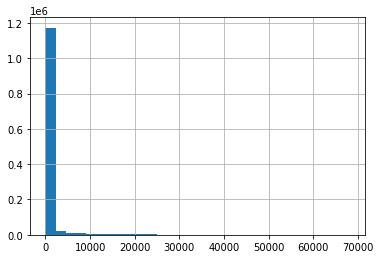

In [26]:
df['gflops'].hist(bins=30)

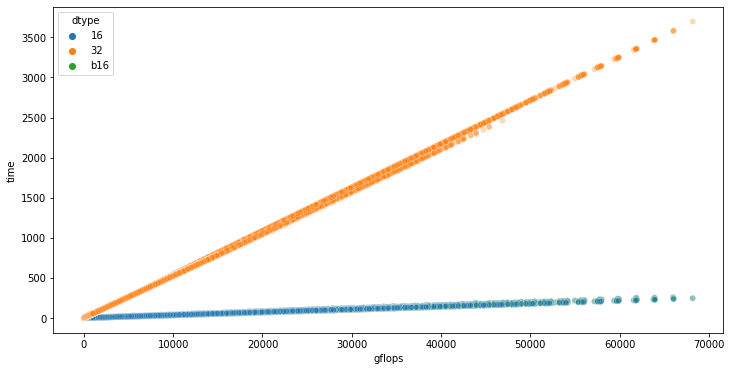

In [27]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="gflops", y="time", hue="dtype", alpha=0.3, data=df)
plt.show()

# mnp

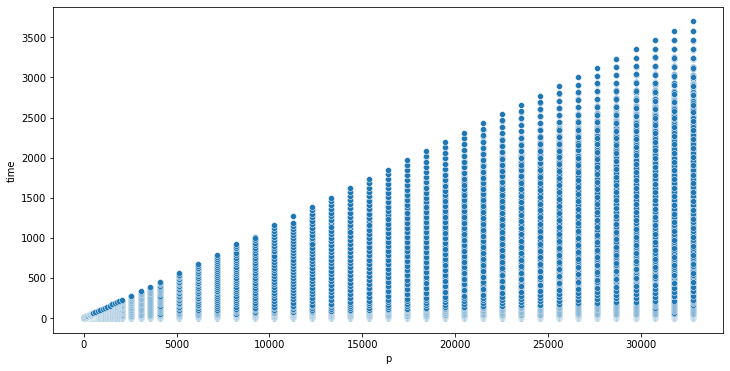

In [29]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="p", y="time", data=df.query("dtype == '32'"))
plt.show()

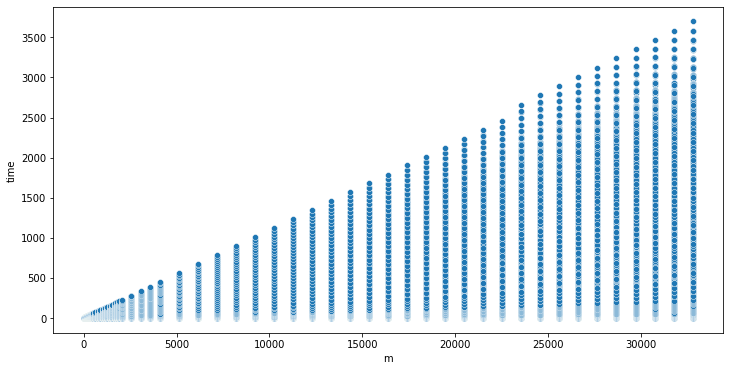

In [30]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="m", y="time", data=df.query("dtype == '32'"))
plt.show()

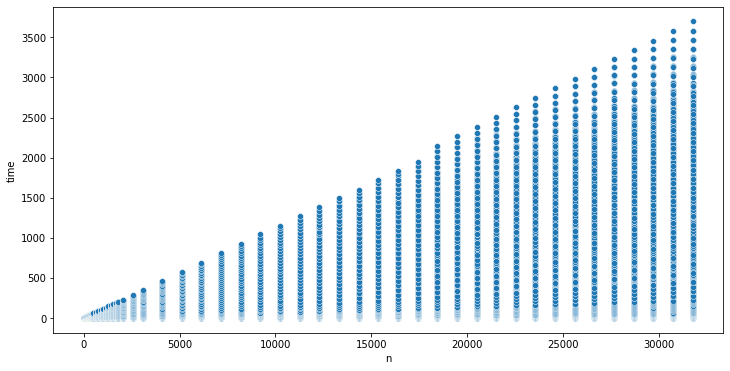

In [31]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="n", y="time", data=df.query("dtype == '32'"))
plt.show()

# gflops highly correlated with time: 0.999

In [32]:
df.groupby("dtype")[["gflops", "time"]].corr()

/var/folders/c8/q9xddvxj5pv262qffnm05sk00000gn/T/ipykernel_99121/310776800.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("dtype")[["gflops", "time"]].corr()


gflops      time
dtype                           
16    gflops  1.000000  0.999083
      time    0.999083  1.000000
32    gflops  1.000000  0.999848
      time    0.999848  1.000000
b16   gflops  1.000000  0.999159
      time    0.999159  1.000000

# Smaller flops: not quite linear.

There are clearly a subset of values

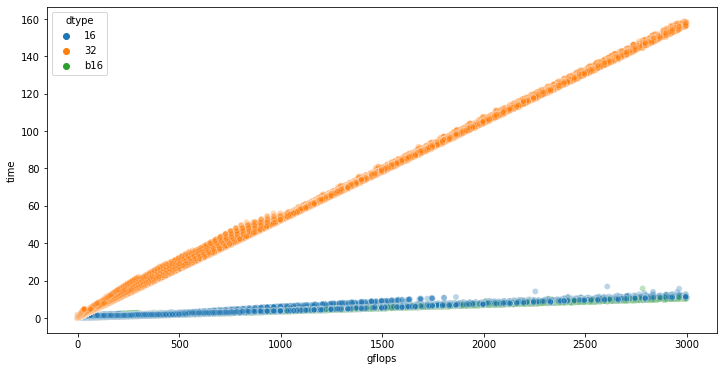

In [61]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="gflops", y="time", hue="dtype", alpha=0.3, data=df.query("gflops < 3000"))
plt.show()

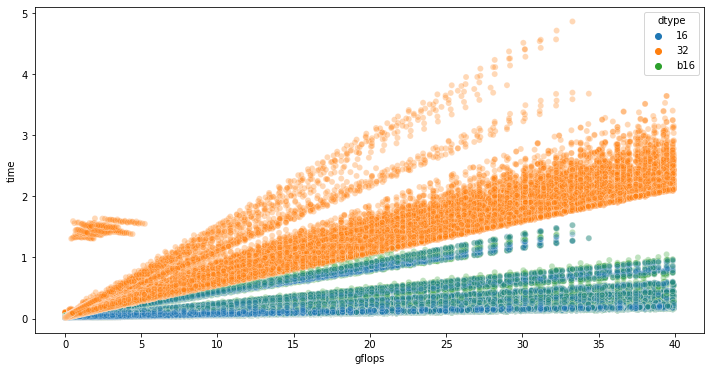

In [35]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="gflops", y="time", hue="dtype", alpha=0.3, data=df.query("gflops < 40"))
plt.show()

In [36]:
df.query("gflops < 40").groupby("dtype")[["gflops", "time"]].corr()

/var/folders/c8/q9xddvxj5pv262qffnm05sk00000gn/T/ipykernel_99121/3659509330.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.query("gflops < 40").groupby("dtype")[["gflops", "time"]].corr()


gflops      time
dtype                           
16    gflops  1.000000  0.704168
      time    0.704168  1.000000
32    gflops  1.000000  0.979145
      time    0.979145  1.000000
b16   gflops  1.000000  0.697445
      time    0.697445  1.000000

# What's up with the "outlier group"?

In [37]:
small_df = df.query('gflops < 10 & time > 1')

In [39]:
small_df.describe()

,n,m,p,time,gflops
count,474.000000,474.000000,474.000000,474.000000,474.000000
mean,5238.582278,22044.084388,1894.919831,1.352137,4.505806
std,8000.607665,7144.944332,5853.029450,0.173352,3.252961
min,16.000000,6144.000000,16.000000,1.001472,0.411042
25%,896.000000,16384.000000,16.000000,1.207552,1.692402
50%,1408.000000,22528.000000,32.000000,1.405440,2.944401
75%,7168.000000,27648.000000,48.000000,1.489408,8.053064
max,31744.000000,32768.000000,32768.000000,1.638912,9.965666


Interesting: lots of small m and p values, but m everywhere

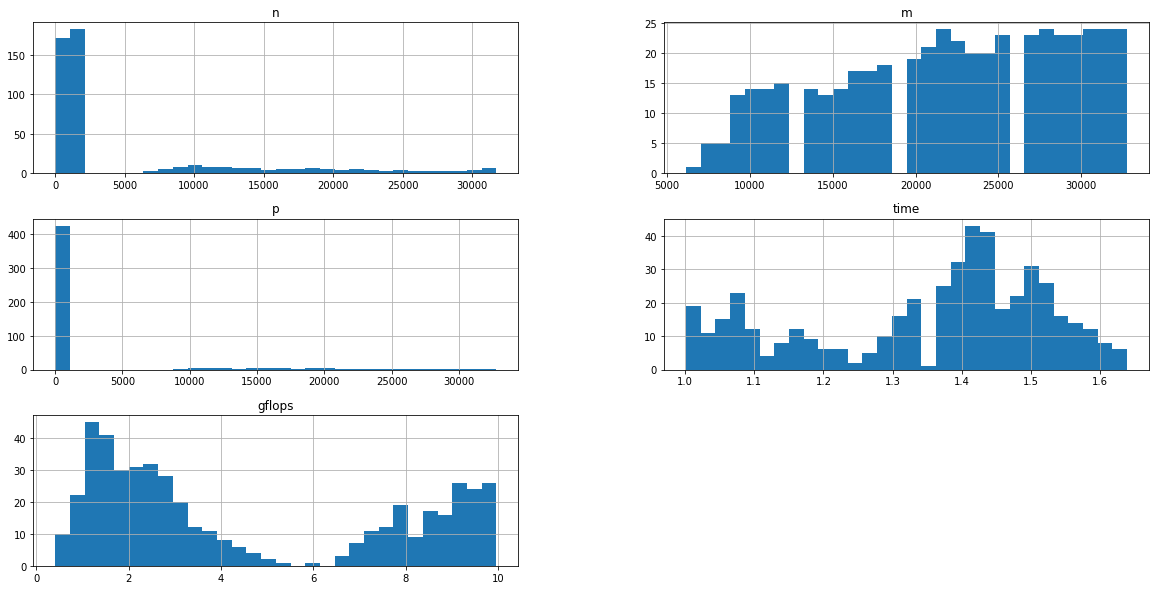

In [46]:
small_df.hist(bins=30, figsize=(20, 10))
plt.show()

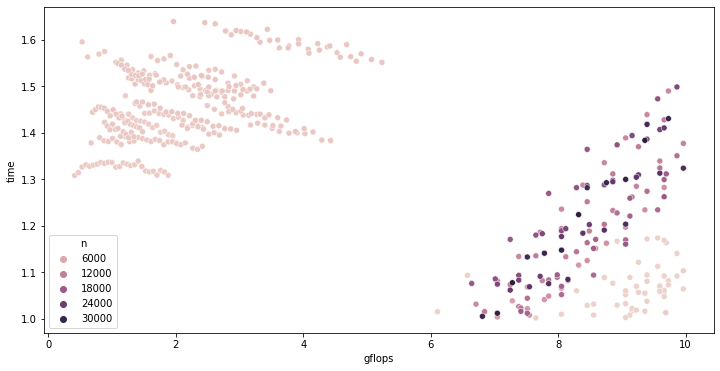

In [63]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="gflops", y="time", hue="n", data=small_df)
plt.show()

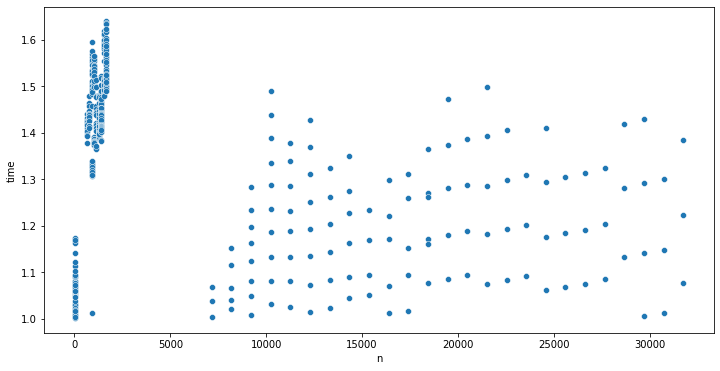

In [55]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="n", y="time", data=df.query('gflops < 10 & time > 1'))
plt.show()

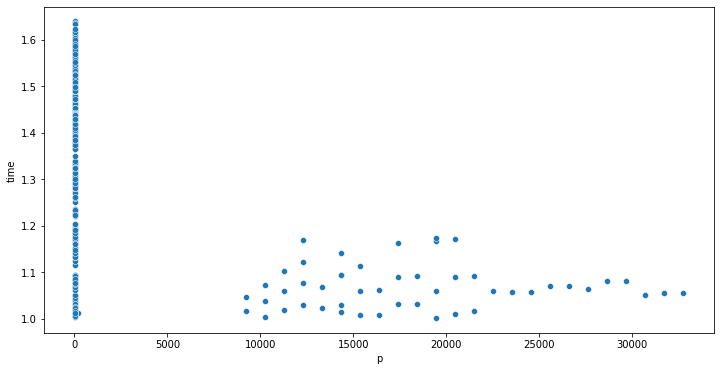

In [59]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="p", y="time", data=df.query('gflops < 10 & time > 1'))
plt.show()

Unlike n and p, not too much dependence on small m

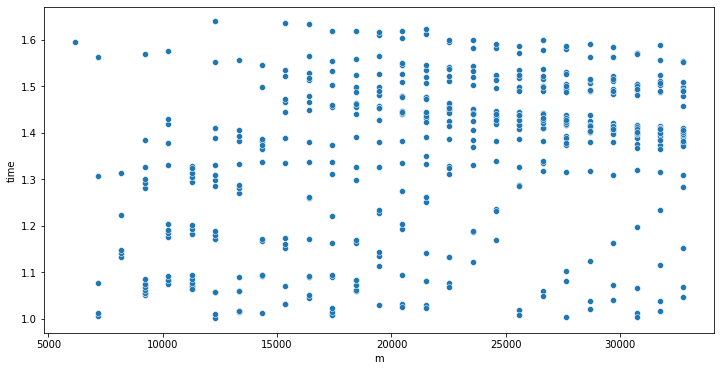

In [60]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="m", y="time", data=df.query('gflops < 10 & time > 1'))
plt.show()

# Switch values?

In [64]:
small_df['p'].describe()

count      474.000000
mean      1894.919831
std       5853.029450
min         16.000000
25%         16.000000
50%         32.000000
75%         48.000000
max      32768.000000
Name: p, dtype: float64

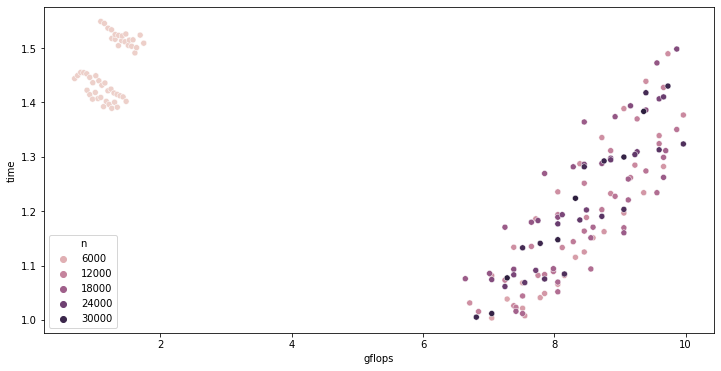

In [67]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="gflops", y="time", hue="n", data=small_df.query("p == 16.0"))
plt.show()

Interesting: one dimension is super large

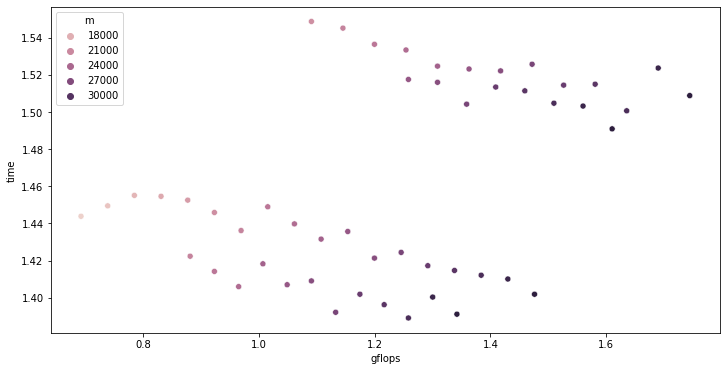

In [80]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="gflops", y="time", hue="m", data=small_df.query("p == 16.0 & n < 6000"))
plt.show()

# Weird: n == p == 16

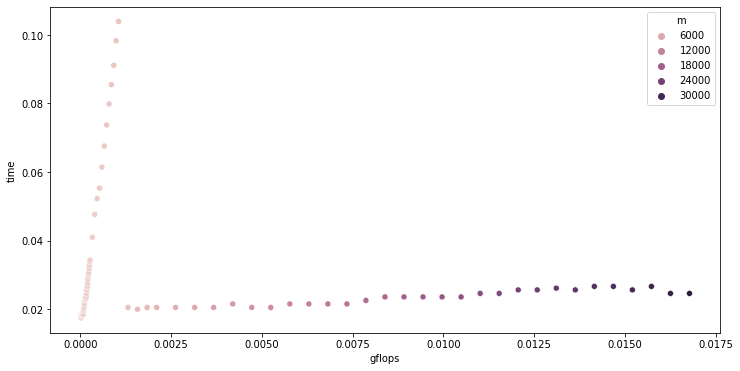

In [82]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="gflops", y="time", hue="m", data=df.query("dtype == '32' & p == 16.0 & n == 16.0"))
plt.show()